In [1]:
%matplotlib notebook

import numpy as np
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
from matplotlib.image import imread #for reading images

# Image Segmentation: An Unsupervised Learning Problem

**Image segmentation** is the task of partitioning an image into multiple segments. By clustering pixels according to their color, then replacing each pixel’s color with the mean color of its cluster, it is possible to considerably reduce the number of different colors in the image. Image segmentation is used in many object detection and tracking systems, as it makes it easier to detect the contour of each object.

-From Geron's Hands-on Machine Learning

# Import the image data

In [2]:
image = imread("ladybug.png")
image.shape 

# (selects the row of the image, selects the column of the image, selects the red/green/blue channel)

(533, 800, 3)

This is a 3D array because we have R-G-B channels.

# Show the original image

<IPython.core.display.Javascript object>


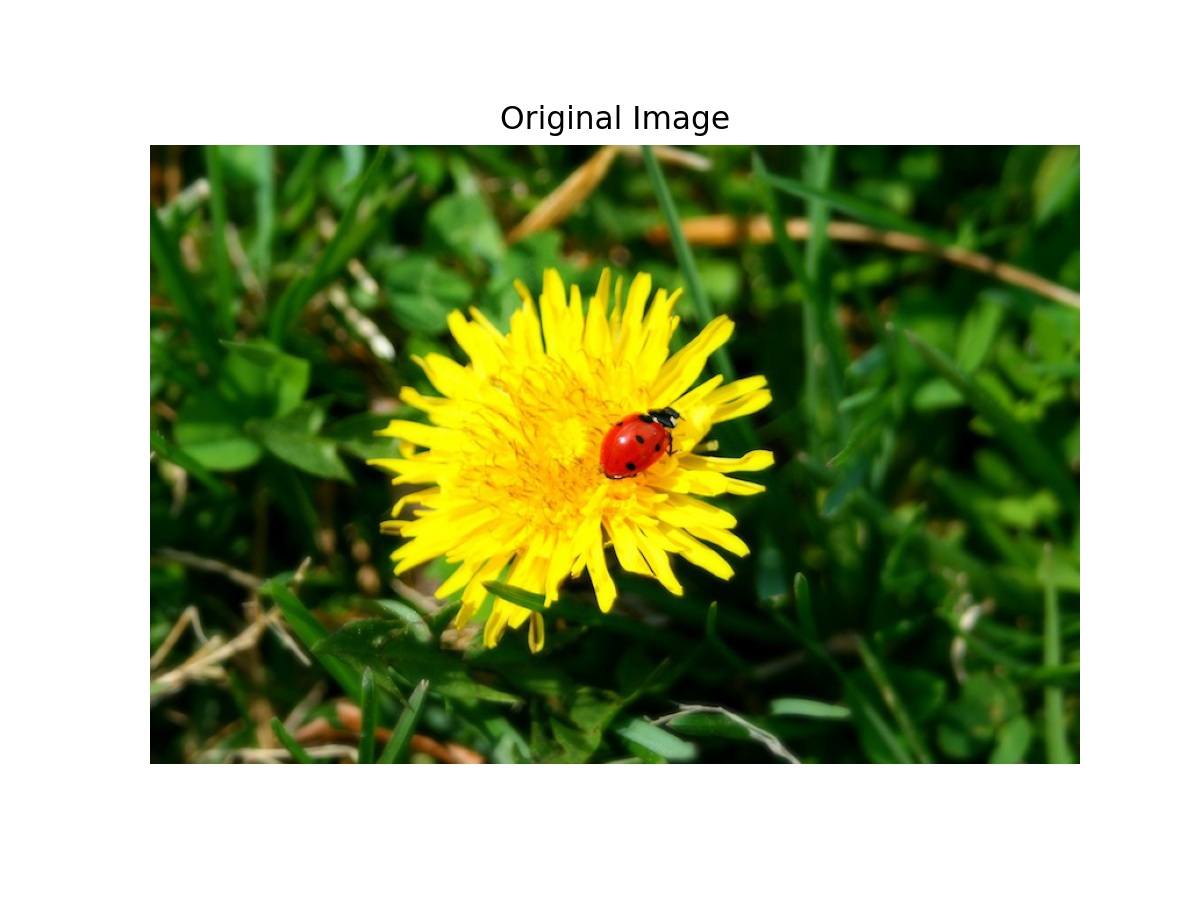

Text(0.5, 1.0, 'Original Image')

In [3]:
plt.figure()
plt.imshow(image)
plt.axis('off')
plt.title('Original Image')

# Converts each of the channels in the 3D matrix into a mx3 matrix

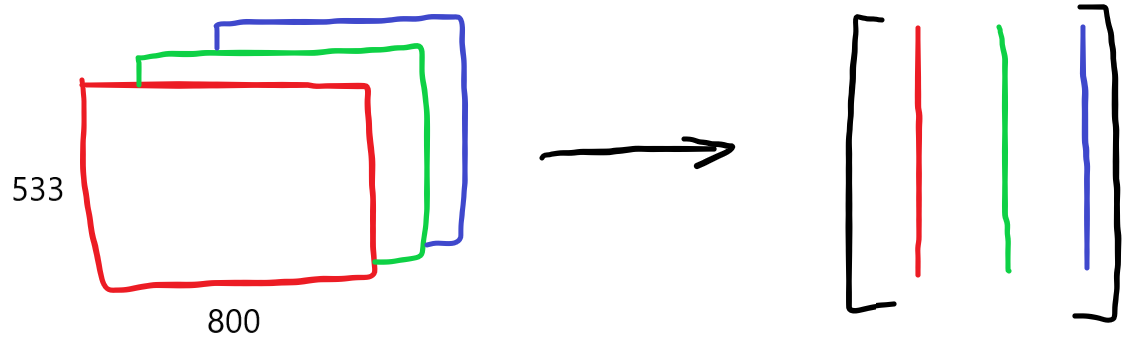

In [5]:
X = image.reshape(-1, 3) 
X.shape

(426400, 3)

# Compute for the mean colors

In [6]:
k_means_model = KMeans(n_clusters=8).fit(X)

### Mean colors

In [7]:
k_means_model.cluster_centers_ # (R, G, B)

array([[0.61771786, 0.37816674, 0.08907661],
       [0.98398936, 0.93898934, 0.0259442 ],
       [0.09296374, 0.24519452, 0.01550109],
       [0.8966641 , 0.7367968 , 0.03265027],
       [0.02143717, 0.10673487, 0.00563746],
       [0.34595916, 0.52515316, 0.1542032 ],
       [0.20887521, 0.37591732, 0.05311829],
       [0.6066625 , 0.63332105, 0.39207345]], dtype=float32)

# Assign each pixel to their corresponding color clusters 

In [8]:
segmented_img = k_means_model.cluster_centers_[k_means_model.labels_]

# Reshape and print the image

In [9]:
segmented_img = segmented_img.reshape(image.shape)

<IPython.core.display.Javascript object>


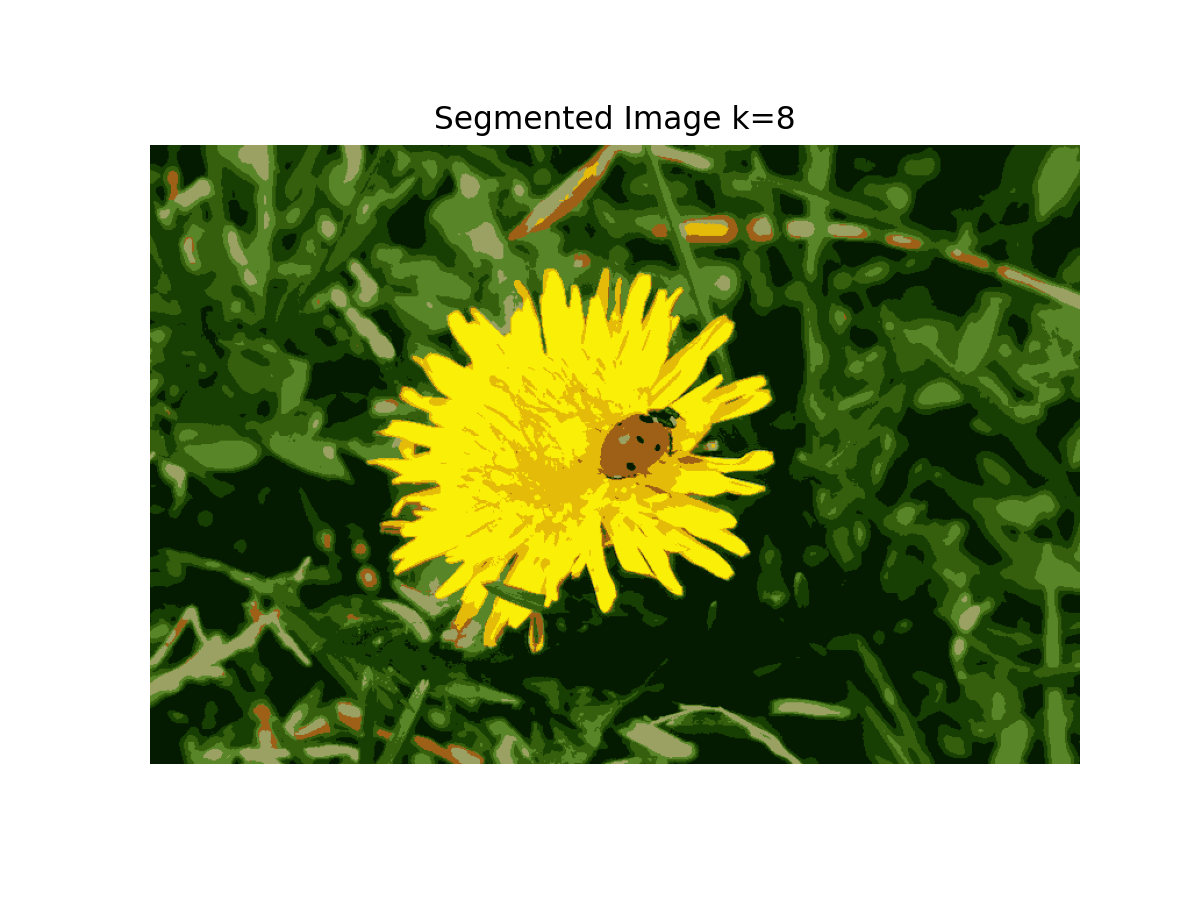

Text(0.5, 1.0, 'Segmented Image k=8')

In [10]:
plt.figure()
plt.imshow(segmented_img)
plt.axis('off')
plt.title('Segmented Image k=8')

# Comparison of various values of k

In [11]:
images_multiple = []
for k in reversed(range(2,11)[::2]):
    print('Starting k={}'.format(k))
    k_means_model = KMeans(n_clusters=k).fit(X)
    segmented_img = k_means_model.cluster_centers_[k_means_model.labels_]
    segmented_img = segmented_img.reshape(image.shape)
    images_multiple.append(segmented_img)

Starting k=10
Starting k=8
Starting k=6
Starting k=4
Starting k=2


<IPython.core.display.Javascript object>


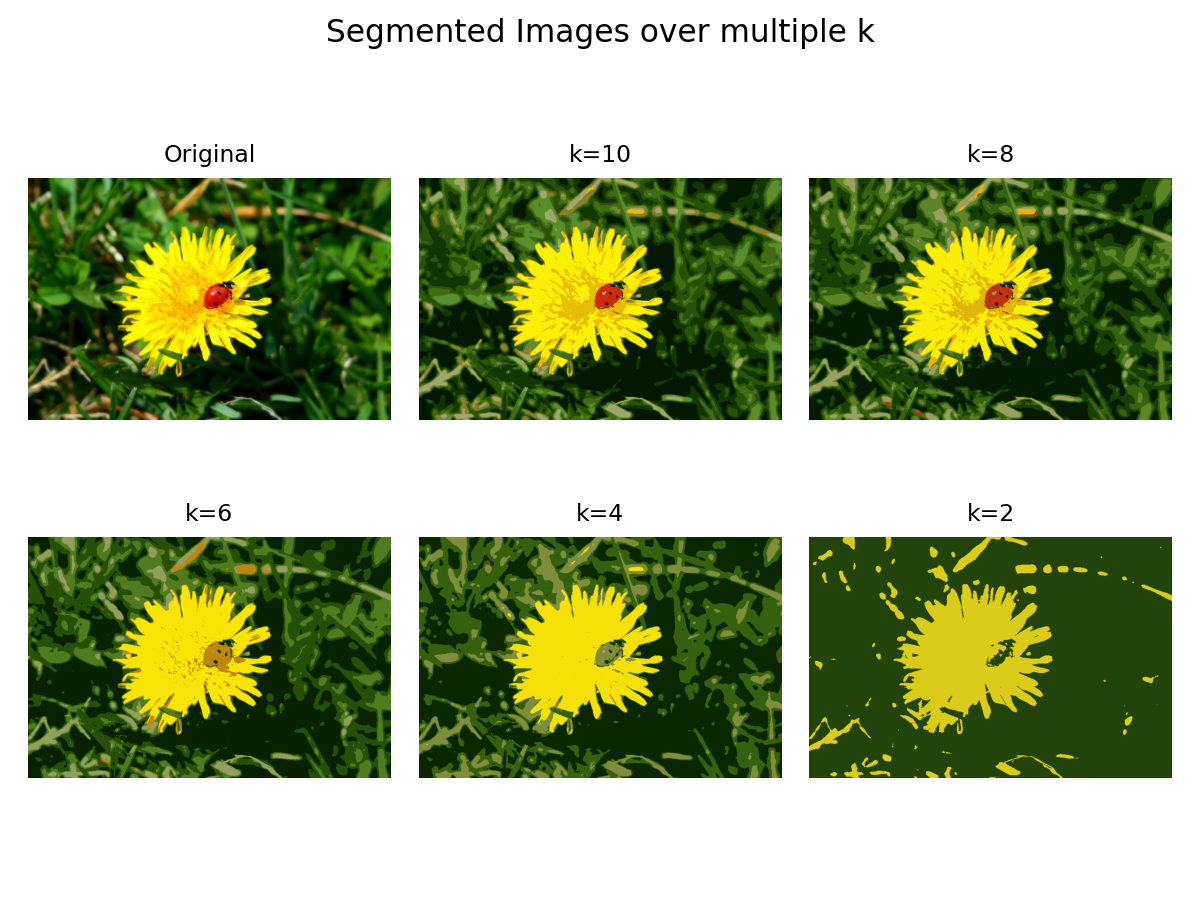

In [12]:
fig, ax = plt.subplots(2, 3)
fig.suptitle('Segmented Images over multiple k')

ax[0,0].imshow(image)
ax[0,0].set_title('Original', fontsize=9)
ax[0,0].axis('off')

ax[0,1].imshow(images_multiple[0])
ax[0,1].set_title('k=10', fontsize=9)
ax[0,1].axis('off')

ax[0,2].imshow(images_multiple[1])
ax[0,2].set_title('k=8', fontsize=9)
ax[0,2].axis('off')

ax[1,0].imshow(images_multiple[2])
ax[1,0].set_title('k=6', fontsize=9)
ax[1,0].axis('off')

ax[1,1].imshow(images_multiple[3])
ax[1,1].set_title('k=4', fontsize=9)
ax[1,1].axis('off')

ax[1,2].imshow(images_multiple[4])
ax[1,2].set_title('k=2', fontsize=9)
ax[1,2].axis('off')

fig.tight_layout()